# **CSC17103 - Colab 2 - Đồ thị ngẫu nhiên & Các mô hình tạo sinh mạng**

Đây là Bài tập 02 trong môn học Khai thác Dữ liệu Đồ thị (Graph Mining) - CSC1703 tại Khoa Công nghệ Thông tin, Trường Đại học Khoa học Tự nhiên, Đại học Quốc gia TP.HCM

Một số thuật ngữ

| Tiếng Anh  | Mô tả  |
|---|---|
| Random graph  | Đồ thị ngẫu nhiên  |
| Generative network model  | Mô hình tạo sinh mạng lưới  |

(Cập nhật lần cuối: 27/05/2024)

Họ tên: Dương Trường Bình

MSSV: 21127229

## **Cách thực hiện và nộp bài tập**

&#9889; Chú ý, bạn nên thực hiện theo sự hướng dẫn dưới đây. Nếu có bất kỳ điều gì không rõ, bạn cần liên hệ ngay trợ giảng/ giáo viên thực hành để được hỗ trợ kịp thời.

**Cách làm bài**

Bạn sẽ làm trực tiếp trên file notebook này. Đầu tiên, bạn điền họ tên và MSSV vào phần đầu file ở bên trên. Trong file, bạn làm bài ở những chỗ có ghi là:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
hoặc đối với những phần code không bắt buộc thì là:
```python
# YOUR CODE HERE (OPTION)
```
hoặc đối với markdown cell thì là:
```markdown
YOUR ANSWER HERE
```

**Cách nộp bài**

Trước khi nộp bài, bạn chọn `Kernel` - `Restart Kernel & Run All Cells` đối với trường hợp sử dụng môi trường local hoặc `Runtime` - `Restart session and run all` đối với môi trường Google Colab, để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, bạn tạo thư mục nộp bài theo cấu trúc sau:
- Thư mục `MSSV` (ví dụ, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`)
    - File `CSC17103_Colab_02.ipynb` (không cần nộp các file khác)

Cuối cùng, bạn nén thư mục `MSSV` này lại với định dạng nén là .zip (chứ không được là .rar hay các định dạng khác) và nộp ở link trên moodle. \
<font color=red>Bạn lưu ý tuân thủ chính xác qui định nộp bài này.</font>

## Setup và Import các thứ

In [1]:
# Upgrade packages
# !pip install --upgrade scipy networkx

In [2]:
# Import
import random
import numpy as np # For numerical computation
import networkx as nx # For network/ graph manipulation
import matplotlib.pyplot as plt # For visualization
import scipy.stats as st
from scipy.stats import ks_2samp
plt.style.use("fast")

%matplotlib inline

In [3]:
# Make sure something
assert nx.__version__ > '2.5'

## Phần 1: Đồ thị ngẫu nhiên (4 điểm)

### Task 1: Mô hình Erdős–Rényi

Mô hình Erdős–Rényi là một mô hình được sử dụng cho phát sinh đồ thị ngẫu nhiên (random graphs) hay mạng ngẫu nhiên (random network). Trong mô hình này, tất cả các đồ thị với một tập đỉnh cố định với một số cố định cạnh được xem là tương đối giống nhau.

Có hai biến thể của mô hình đồ thị ngẫu nhiên Erdős–Rényi:
- Mô hình thứ nhất, ký hiệu là $G(n,M)$, một đồ thị được chọn một cách ngẫu nhiên từ tập tất cả các đồ thị mà có $n$ đỉnh và $M$ cạnh. Các đỉnh được coi là có nhãn, điều này có nghĩa là đồ thị nhận được từ bởi hóa vị các đỉnh được xem là phân biệt nhau. 

Ví dụ 1: Xem xét mô hình $G(3, 2)$, có 3 đồ thị 2 cạnh trên ba đỉnh được gán nhãn (một cho mỗi sự lựa chọn của đỉnh giữa trong một đường đi hai cạnh), và mỗi một trong ba đồ thị được gắn với xác suất $\dfrac{1}{3}$

- Mô hình thứ hai, ký hiệu là $G(n, p)$, một đồ thị được xây dựng bằng cách nối các đỉnh được gán nhãn một cách ngẫu nhiên. Mỗi cạnh được đưa vào đồ thị với xác suất $p$, độc lập với mọi cạnh khác. Một cách tương đương, xác suất để sinh mỗi đồ thị mà có $n$ đỉnh và $M$ cạnh là:
$$
p^M(1-p)^{\binom{n}{2} - m}
$$
Tham số $p$ trong mô hình này có thể được hiểu như một hàm trọng (weighting function), khji $p$ tăng từ 0 đến 1, mô hình càng có xu hướng thêm nhiều cạnh vào đồ thị, và ngược lại.

<font color=DodgerBlue>Trong phần này, chúng ta sẽ thử cài đặt mô hình Erdős–Rényi với biến thể mỗi cặp của $n$ đỉnh được liên kết với nhau với một xác suất cố định.</font>

Các bạn cần hoàn thành hàm `randomEdgesGenerator` với các tham số:
- `nodes` (np.array): một mảng numpy chứa các chỉ số đỉnh. Ví dụ: `[1, 2, 3, 4]`
- `p` (float): xác suất của liên kết (có giá trị thực, chạy từ 0 tới 1).
Hàm này trả về một mảng numpy (np.array) với các tuples có dạng `[(1, 2), (2, 4)]`, trong đó `1-2` là một cạnh nên được thêm vào đồ thị.

In [4]:
def randomEdgesGenerator(nodes: np.ndarray, p: float) -> np.array:
    """Hàm phát sinh danh sách cạnh ngẫu nhiên

    Parameters
    ----------
    nodes
        (np.array): một mảng numpy chứa các chỉ số đỉnh. Ví dụ: `[1, 2, 3, 4]`
    p
        (float): xác suất của liên kết (có giá trị thực, chạy từ 0 tới 1).

    Returns
    -------
        (np.array) với các tuples có dạng `[(1, 2), (2, 4)]`, trong đó `1-2` là một cạnh nên được thêm vào đồ thị.
    """
    # YOUR CODE HERE
    edges = np.array([(i, j) for i in range(len(nodes)) for j in range(i+1, len(nodes)) if random.random() <= p])
    return edges

In [5]:
def ERModelGenerator(n: int, p: float) -> nx.Graph:
    """Hàm phát sinh đồ thị ngẫu nhiên dựa trên mô hình Erdős–Rényi

    Parameters
    ----------
    n
        số đỉnh của đồ thị
    p
        xác suất liên kết

    Returns
    -------
        (nx.Graph) đồ thị ngẫu nhiên
    """
    G = nx.Graph()
    nodes = np.arange(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(randomEdgesGenerator(nodes, p))
    return G

In [6]:
# Test 01
assert len(ERModelGenerator(100, 0.1).edges) > 0

In [7]:
# Test 02
n = 100
p = 0.4
n_edges = n * (n - 1) / 2
q = 1 - p
sigma = np.sqrt((p * q) / n_edges)
assert (
    p - 3 * sigma
    < randomEdgesGenerator(np.arange(n), p).shape[0] / n_edges
    < p + 3 * sigma
)

In [8]:
# Test 03
n = 1000
p = 0.01
n_edges = n * (n - 1) / 2
q = 1 - p
sigma = np.sqrt((p * q) / n_edges)
assert (
    p - 3 * sigma
    < randomEdgesGenerator(np.arange(n), p).shape[0] / n_edges
    < p + 3 * sigma
)

In [9]:
# Test 04
n = 300
p = 0.9
n_edges = n * (n - 1) / 2
q = 1 - p
sigma = np.sqrt((p * q) / n_edges)
assert (
    p - 3 * sigma
    < randomEdgesGenerator(np.arange(n), p).shape[0] / n_edges
    < p + 3 * sigma
)

Trực quan hóa các trường hợp trạng thái mạng lưới.

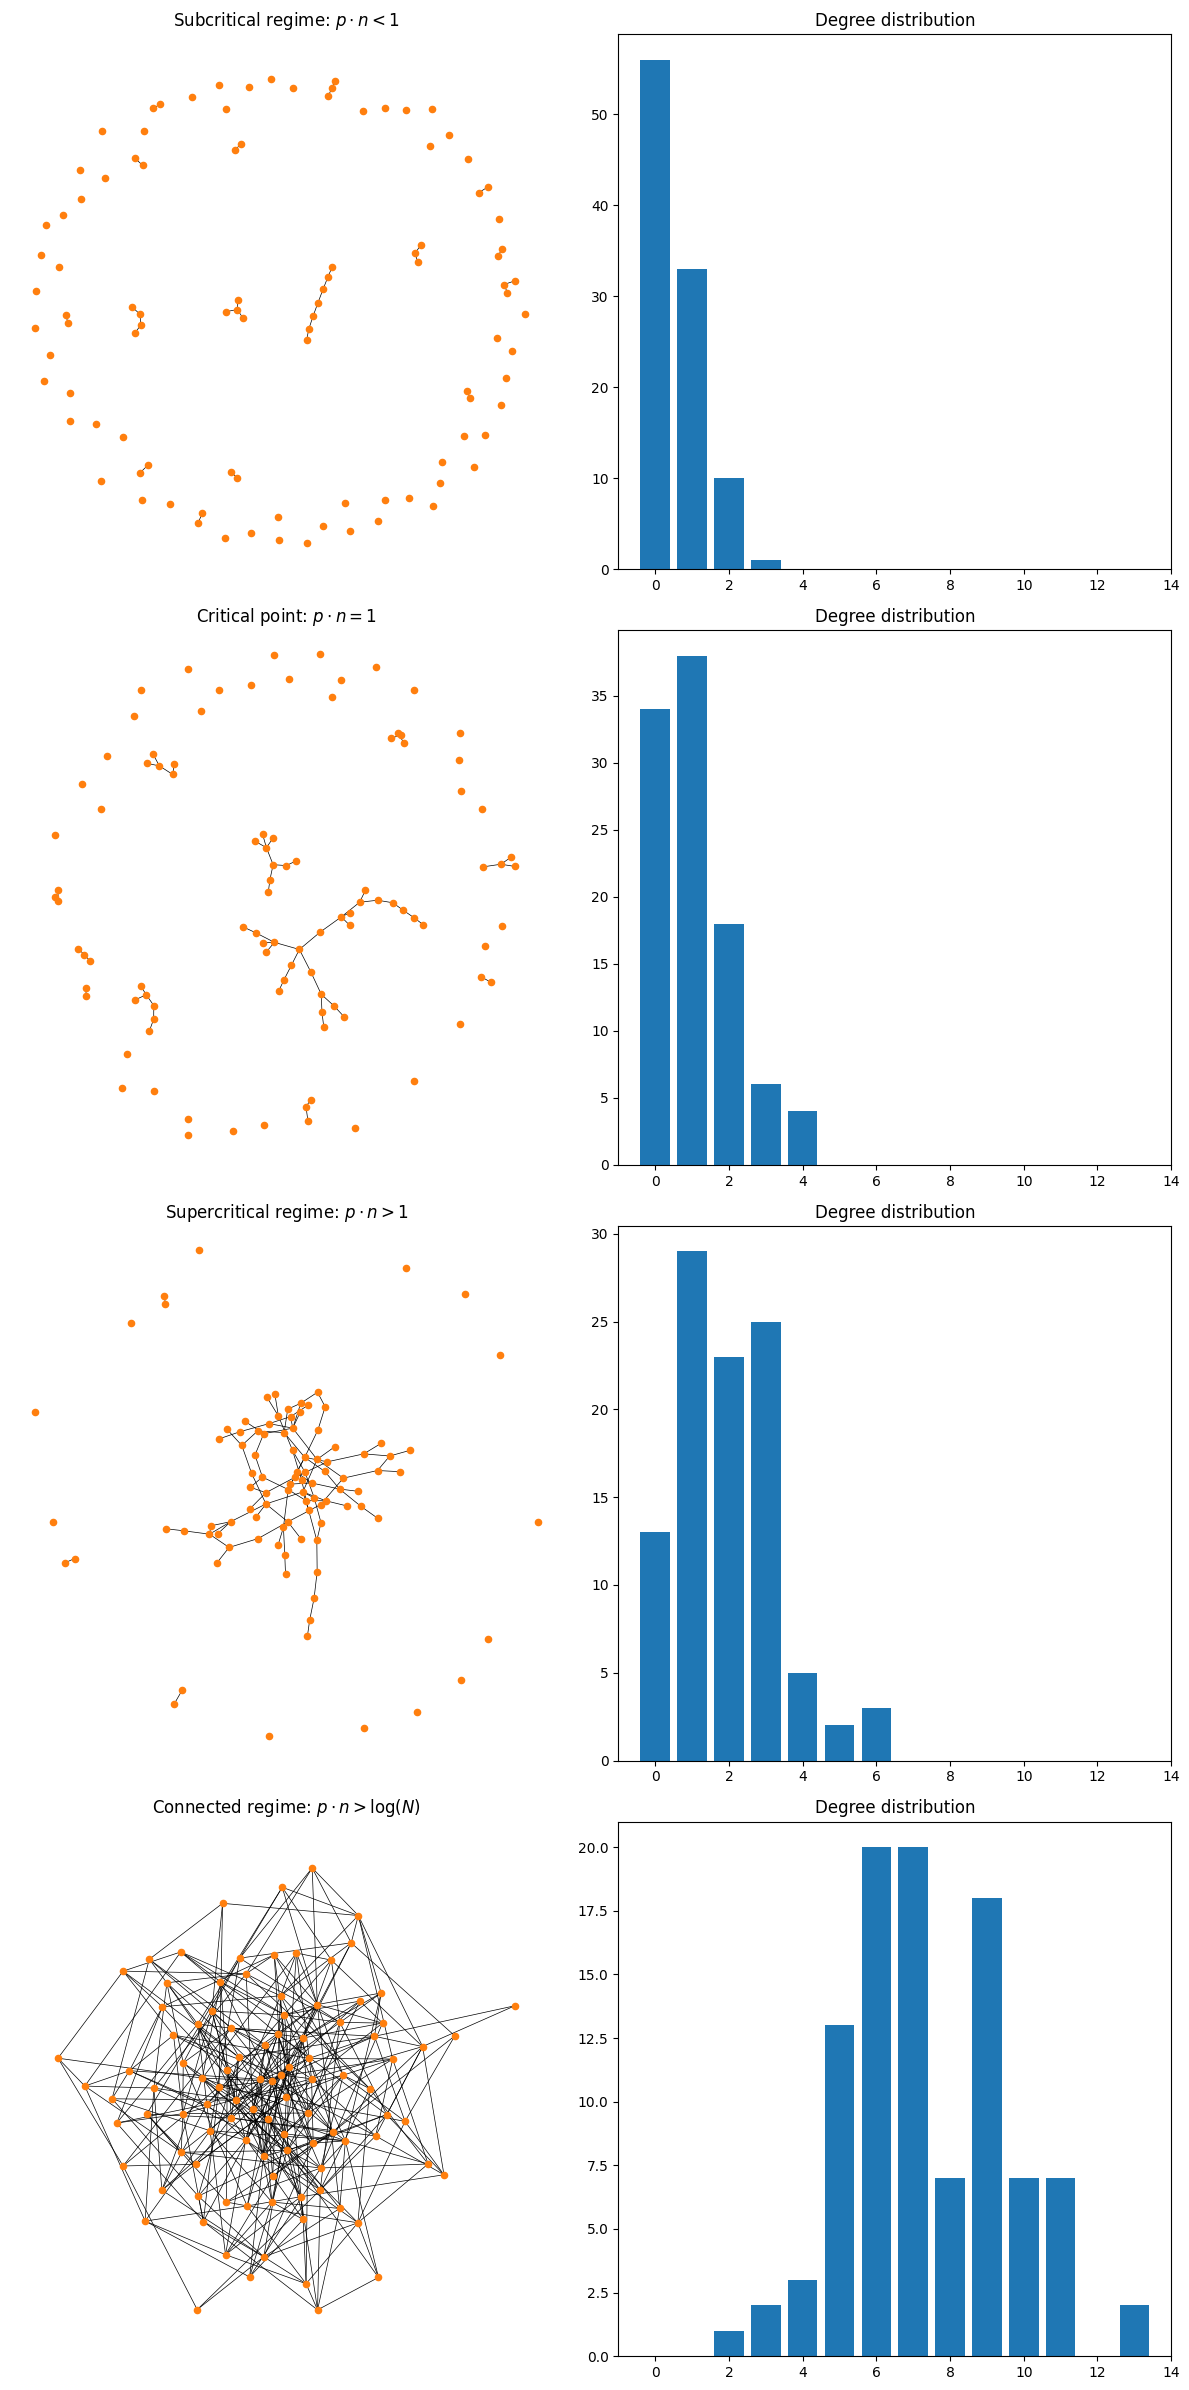

In [10]:
n = 100
cases = [
    (r'Subcritical regime: $p \cdot n < 1$', n, 0.5 / n),
    (r'Critical point: $p \cdot n = 1$', n, 1 / n),
    (r'Supercritical regime: $p \cdot n > 1$', n, 2 / n),
    (r'Connected regime: $p \cdot n > \log(N)$', n, 6.5 / n)
]

plt.figure(figsize=(12, 24))

for i, (regime, n, p) in enumerate(cases):
    G = ERModelGenerator(n, p)
    
    # Plot the graph
    plt.subplot(4, 2, 2 * i + 1)
    nx.draw(G, with_labels=False, node_size=20, width=0.5, node_color='tab:orange')
    plt.title(regime)
    
    # Plot the degree distribution
    plt.subplot(4, 2, 2 * i + 2)
    degree_seq = [degree for node, degree in G.degree]
    bins, freq = np.unique(degree_seq, return_counts=True)
    plt.bar(bins, freq)
    plt.xlim(-1, 14)
    plt.title('Degree distribution')

plt.tight_layout()
plt.show()

Nhận xét của bạn (nếu có)

Đồ thị trên trực quan hình dạng và phân phối bậc của các trường hợp trạng thái mạng lưới. 

- Subcritical regime: $p\cdot n < 1$:

    Với xác suất liên kết thấp ($p < \dfrac{1}{n}$), trung bình bậc nhỏ hơn 1, đồ thị lúc này chủ yếu bao gồm các thành phần liên thông nhỏ và rời rạc, có kích thước tương đương nhau. Histogram bậc của đồ thị cho thấy chủ yếu các đỉnh có bậc 0 hoặc 1, chỉ một số ít đỉnh có bậc 2 hoặc 3. 

- Critical point: $p\cdot n = 1$:

    Đồ thị có xác suất liên kết bằng hoặc gần bằng với ngưỡng $\dfrac{1}{n}$, trung bình bậc của đồ thị bằng 1. Đây là thời điểm quan trọng khi mà kích thước các thành phần đã có sự khác biệt, các thành phần nhỏ bắt đầu liên kết với nhau tạo thành một thành phần liên thông lớn. Histogram bậc của đồ thị cũng cho thấy sự chuyển đổi này, với số lượng đỉnh có bậc 1-3 tăng lên, có thêm một ít đỉnh bậc 4. 

- Supercritical regime: $p\cdot n > 1$:

    Với xác suất liên kết cao ($p > \dfrac{1}{n}$), trung bình bậc lớn hơn 1, đồ thị lúc này chủ yếu đã hình thành thành phần liên thông lớn và chiếm một phần đáng kể số đỉnh trong mạng, còn lại là số ít các thành phần nhỏ hoặc bị cô lập. Histogram cho thấy sự phân phối bậc của đồ thị đã trở nên khác biệt rõ rệt với các giai đoạn trước: số đỉnh bậc 0 giảm đi nhiều và chủ yếu các đỉnh có bậc 1-3, đã xuất hiện các đỉnh có bậc khá cao (5-6). Giai đoạn này sẽ kéo dài đến khi thành phần liên thông lớn chiếm hết mạng.

- Connected regime: $p\cdot n > \ln(n)$:

    Đồ thị có trung bình bậc của đồ thị lớn hơn $\log(n)$, xác suất liên kết cao hơn ngưỡng $\dfrac{\ln(n)}{n}$. Đây là giai đoạn mà mạng đã hình thành thành phần liên thông lớn và chiếm hết mạng, các thành phần nhỏ hoặc cô lập đã kết nối với thành phần lớn. Histogram cho thấy sự phân phối bậc của đồ thị đã trở nên khác biệt rõ rệt với các giai đoạn trước: không còn đỉnh bậc 0, chủ yếu các đỉnh có bậc 5-8, phân phối bậc có hình dạng gần giống với phân phối chuẩn.


### Task 2: Khớp các tham số của phân phối bậc

Trong mô hình Erdos-Renyi, chúng ta có thể ước tính phân phối độ bằng cách sử dụng phân phối nhị thức. Phân phối nhị thức $B(n, p)$ hội tụ về Poisson $\text{Pois}(\lambda)$ khi số lượng mẫu $n$ có xu hướng tiến tới vô cùng với tích cố định $np = \lambda$.

Nếu bạn quên (hoặc không biết?) về phân phối nhị thức và phân phối Poisson thì có thể tìm đọc ở đây:
- [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)
- [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)

Một cuốn sách hay mà các bạn có thể cần khi ôn tập về xác suất, [Introduction to Probability Models, Tenth Edition](https://faculty.ksu.edu.sa/sites/default/files/introduction-to-probability-model-s.ross-math-cs.blog_.ir_.pdf)

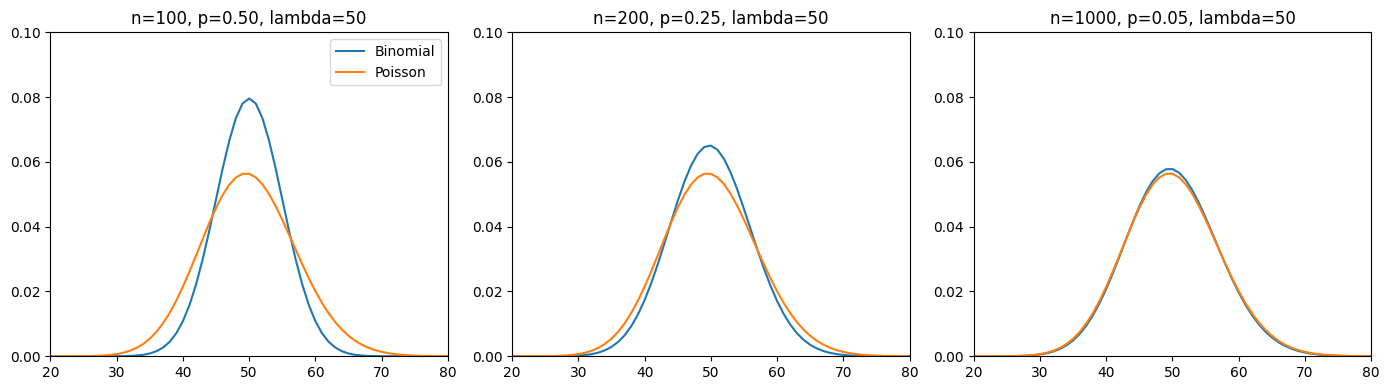

In [11]:
plt.figure(figsize=[14, 4])

x_values = np.arange(100)
params = [(100, 50), (200, 50), (1000, 50)]

for i, (n, mean) in enumerate(params):
    plt.subplot(1, 3, i + 1)
    plt.plot(st.binom(n, mean / n).pmf(x_values), label="Binomial")
    plt.plot(st.poisson(mean).pmf(x_values), label="Poisson")
    plt.xlim(20, 80)
    plt.ylim(0, 0.1)
    plt.title(f'n={n}, p={mean / n:.2f}, lambda={mean}')
    if i == 0:
        plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


Trong phần này, chúng ta sẽ cố gắng ước lượng các thuộc tính của phân phối Nhị thức và phân phối Poisson, và so sánh trong một số trường hợp mà sẽ tốt hơn nếu sử dụng phân phối Nhị thức.

Các bạn cần hoàn thành hàm `estimateBinomial` mà nhận đầu vào là một đồ thị ngẫu nhiên và trả về các tham số của phân phối Nhị thức bao gồm `n` và `p`

In [12]:
def estimateBinomial(G: nx.Graph) -> tuple[int, float]:
    # YOUR CODE HERE
    n = G.number_of_nodes()
    m = G.number_of_edges()
    k = 2 * m / n
    p = k / (n - 1)
    return n, p

In [13]:
# Test 1
G = ERModelGenerator(100, 0.5)
n, p = estimateBinomial(G)
assert abs(p - 0.5) <= 0.05
assert n == 100

In [14]:
# Test 2
G = ERModelGenerator(1000, 0.2)
n, p = estimateBinomial(G)
assert abs(p - 0.5) <= 0.5
assert n == 1000

Viết hàm `estimatePoission` mà nhận đầu vào là một đồ thị ngẫu nhiên và trả về tham số phân phối Poission $\lambda$.

In [15]:
def estimatePoisson(G: nx.Graph) -> float:
    # YOUR CODE HERE
    n, p = estimateBinomial(G)
    lambda_ = n * p
    return lambda_

In [16]:
G = ERModelGenerator(1000, 0.05)
m = estimatePoisson(G)
assert abs(m - 50) <= 1

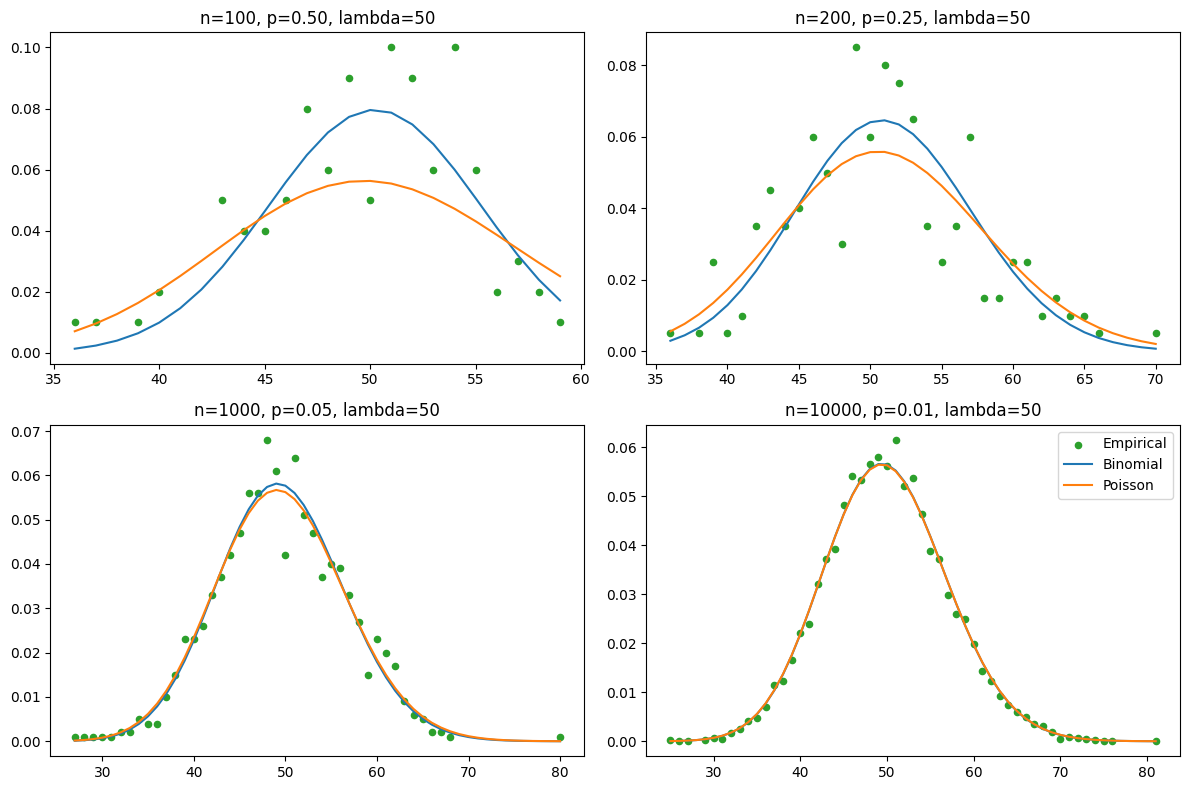

In [17]:
plt.figure(figsize=[12, 8])

params = [(100, 0.5), (200, 0.25), (1000, 0.05), (10000, 0.005)]

for i, (n, p) in enumerate(params):
    plt.subplot(2, 2, i + 1)
    G = ERModelGenerator(n, p)
    
    # Compute degree density
    degree_hist = np.array(nx.degree_histogram(G))
    degree_density = degree_hist / n
    non_zero_idx = np.nonzero(degree_density)[0]

    # Scatter plot of empirical degree density
    plt.scatter(non_zero_idx, degree_density[non_zero_idx], label="Empirical", color='tab:green', s=20)
    
    # Degree space for the theoretical distributions
    degrees = list(dict(G.degree).values())
    k_space = np.arange(min(degrees), max(degrees) + 1)
    
    # Binomial distribution
    binom_n, binom_p = estimateBinomial(G)
    plt.plot(k_space, st.binom(binom_n, binom_p).pmf(k_space), label="Binomial")
    
    # Poisson distribution
    lambda_poisson = estimatePoisson(G)
    plt.plot(k_space, st.poisson(lambda_poisson).pmf(k_space), label="Poisson")
    
    plt.title(f'n={n}, p={p:.2f}, lambda={n * p:.0f}')

plt.legend()
plt.tight_layout()
plt.show()

Nhận xét của bạn (nếu có)

Các biểu đồ trên trực quan hóa phân phối bậc của đồ thị ngẫu nhiên và phân phối bậc ước lượng từ phân phối Nhị thức và Poisson.

1. **Biểu đồ con trên cùng bên trái (n=100, p=0.50, λ=50):**
   - Với `n=100` và `p=0.50`, sự khác biệt giữa phân phối nhị thức và Poisson rất rõ ràng.
   - Phân phối bậc của dữ liệu thực nghiệm (các điểm màu xanh) không khớp tốt với cả hai phân phối.

2. **Biểu đồ con trên cùng bên phải (n=200, p=0.25, λ=50):**
   - Khi `n` tăng lên 200 và `p` giảm xuống 0.25, đường phân phối nhị thức bắt đầu gần hơn với đường phân phối Poisson.
   - Dữ liệu thực nghiệm dù khớp tốt hơn một chút nhưng vẫn còn phân tán so với cả hai phân phối.
3. **Biểu đồ con dưới cùng bên trái (n=1000, p=0.05, λ=50):**
   - Với `n=1000` và `p=0.05`, đường phân phối nhị thức rất gần với đường phân phối Poisson.
   - Dữ liệu thực nghiệm khớp tốt với cả hai đường phân phối, cho thấy sự tiệm cận của phân phối nhị thức với phân phối Poisson.

4. **Biểu đồ con dưới cùng bên phải (n=10000, p=0.01, λ=50):**
   - Với `n=10000` và `p=0.01`, đường phân phối nhị thức gần như trùng khớp hoàn toàn với đường phân phối Poisson.
   - Dữ liệu thực nghiệm khớp rất tốt với cả hai đường phân phối.

Tổng quan, 4 biểu đồ trên đã cho thấy đúng với lý thuyết, khi mà số lượng mẫu tăng lên, phân phối bậc của đồ thị ngẫu nhiên được ước tính bằng phân phối nhị thức và hội tụ về phân phối Poisson khi số lượng mẫu tiến tới vô cùng với $\lambda = np$ cố định.
**Trường hợp nào tốt hơn nếu dùng phân phối nhị thức?**

Dựa trên các biểu đồ và dữ liệu trong file, có thể rút ra một số kết luận về việc khi nào nên sử dụng phân phối nhị thức thay vì phân phối Poisson:

- Khi `n` không quá lớn và `p` không quá nhỏ: Trong các trường hợp như `n=100` và `p=0.50` (biểu đồ con trên cùng bên trái) hoặc `n=200` và `p=0.25` (biểu đồ con trên cùng bên phải), phân phối nhị thức thể hiện sự khác biệt rõ rệt so với phân phối Poisson. Trong những trường hợp này, sử dụng phân phối nhị thức sẽ mô tả chính xác hơn tính chất của dữ liệu thực nghiệm.

- Khi `λ` không quá nhỏ: Khi giá trị lambda (λ) không quá nhỏ, chẳng hạn như 50 trong các biểu đồ này, và giá trị `p` không quá nhỏ, thì phân phối nhị thức sẽ khác biệt rõ rệt so với phân phối Poisson. Điều này đặc biệt đúng khi `n` không đủ lớn để phân phối nhị thức tiệm cận phân phối Poisson.




## Phần 2: Các mô hình tạo sinh mạng lưới (4 điểm)

Trong phần chúng ta sẽ thử tìm hiểu một số mô hình tạo sinh mạng lưới. Để đọc thêm về chúng, các bạn có thể tìm đọc trong cuốn Network science.

### Task 3: Mô hình sinh Watts-Strogatz

Trong phần này, chúng ta sẽ thử cài đặt mô hình Watts-Strogatz (mô hình thế giới nhỏ) — kết nối lại một cạnh có xác suất `p` trong mạng vòng với các `n` đỉnh và bậc `k`.

Các bạn hoàn thành viết hàm `ringLattice` trả về một mạng vòng thông thường có `n` đỉnh (0, 1, 2, ..., n-1) và bậc đỉnh `k`. Trong trường hợp bậc đỉnh là số lẻ, nó sẽ làm tròn nó đến số chẵn nhỏ hơn gần nhất.

In [18]:
def ringLattice(n: int, k: int) -> nx.Graph:
    """Hàm tạo đồ thị vòng.

    Parameters
    ----------
    n
        (int) số lượng đỉnh cho trước
    k
        (int) bậc đỉnh

    Returnsx
    -------
        (nx.Graph) đồ thị kết quả
    """
    # YOUR CODE HERE
    G = nx.Graph()
    nodes = np.arange(n)
    G.add_nodes_from(nodes)
    for i in range(n):
        for j in range(1, k//2 + 1):
            G.add_edge(i, (i + j) % n)
            G.add_edge(i, (i - j) % n)
            
    return G

In [19]:
# Test 1
assert nx.degree_histogram(ringLattice(10, 2))[2] == 10
assert nx.degree_histogram(ringLattice(10, 3))[2] == 10
assert nx.degree_histogram(ringLattice(10, 4))[4] == 10

In [20]:
# Test 2
assert nx.degree_histogram(ringLattice(20, 3))[2] == 20
assert nx.degree_histogram(ringLattice(20, 4))[4] == 20
assert nx.degree_histogram(ringLattice(20, 5))[4] == 20

In [21]:
# Test 3
assert nx.degree_histogram(ringLattice(100, 6))[6] == 100
assert nx.degree_histogram(ringLattice(100, 8))[8] == 100
assert nx.degree_histogram(ringLattice(100, 10))[10] == 100

Và sau đó, các bạn hoàn thành hàm `rewire` nhận đầu vào là mạng vòng `G`, `node`, tham số mô hình `k` và xác suất `p`. Đối với mọi cạnh bên phải $i$, hàm sẽ nối lại một cạnh (`node`, $i$) thành một cạnh ngẫu nhiên (`node`, $j$) với xác suất `p` trong đó $i \neq j \neq $ `nút`.

Các bạn biết tạo sao chúng ta chỉ xem xét bên phải không? Chúng ta muốn đảm bảo rằng chỉ những cạnh chưa được xét trong các lần lặp trước đó sẽ được kết nối (rewire). 

![](./figure/watts_strogatz_how_to_rewire.png)

Và để tăng tốc độ tạo sinh, không lọc các nút theo lựa chọn ngẫu nhiên. Nếu nút được chọn tạo ra một cạnh hoặc một vòng lặp hiện có, chỉ cần bỏ qua nút đó.

In [22]:
def rewire(G: nx.Graph, node: int, k: int, p: float) -> nx.Graph:
    """Hàm rewire để nối lại một cạnh (node, i) thành một cạnh (node, j) ngẫu nhiên với xác suất cho trước.
    
    Parameters
    ----------
    G
        (nx.Graph) đồ thị đầu vào
    node
        (int) input node
    k
        (int) bậc đỉnh
    p
        (float) xác suất nối lại

    Returns
    -------
        (nx.Graph) đồ thị kết quả
    """
    # YOUR CODE HERE

    neighbors = list(G.neighbors(node))
    n = len(G.nodes)
    for i in range(1, k // 2 + 1):
        target = (node + i) % n
        if random.random() <= p:
            new_target = random.choice(list(G.nodes))
            while new_target == target or new_target == node or G.has_edge(node, new_target):
                new_target = random.choice(list(G.nodes))
            G.remove_edge(node, target)
            G.add_edge(node, new_target)
    return G
    

In [23]:
def WSGraphGenerator(n: int, k: int, p: float) -> nx.Graph:
    """Hàm tạo sinh mạng dựa trên mô hình Watts-Strogatz

    Parameters
    ----------
    n
        (int) số lượng đỉnh cho trước
    k
        (int) bậc đỉnh
    p
        (float) xác suất nối lại

    Returns
    -------
        (nx.Graph) đồ thị kết quả
    """
    G = ringLattice(n, k)
    for node in G.nodes:
        rewire(G, node, k, p)
    return G

In [24]:
# Test 1
n, k, p = 50, 8, 0.1
G = WSGraphGenerator(n, k, p)
assert nx.number_of_nodes(G) == n
assert nx.number_of_edges(G) == int(k / 2 * n)
degree_seq = [degree for (node, degree) in G.degree]
nxG = nx.watts_strogatz_graph(n, k, p, 1)
nxdegree_seq = [degree for (node, degree) in nxG.degree]
assert ks_2samp(degree_seq, nxdegree_seq).pvalue > 0.05

In [25]:
# Test 2
n, k, p = 1000, 10, 0.01
G = WSGraphGenerator(n, k, p)
assert nx.number_of_nodes(G) == n
assert nx.number_of_edges(G) == int(k / 2 * n)
degree_seq = [degree for (node, degree) in G.degree]
nxG = nx.watts_strogatz_graph(n, k, p, 1)
nxdegree_seq = [degree for (node, degree) in nxG.degree]
assert ks_2samp(degree_seq, nxdegree_seq).pvalue > 0.05

c:\Users\HP\anaconda3\envs\gm_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


In [26]:
# Test 3
n, k, p = 1000, 10, 0.5
G = WSGraphGenerator(n, k, p)
assert nx.number_of_nodes(G) == n
assert nx.number_of_edges(G) == int(k / 2 * n)
degree_seq = [degree for (node, degree) in G.degree]
nxG = nx.watts_strogatz_graph(n, k, p, 1)
nxdegree_seq = [degree for (node, degree) in nxG.degree]
assert ks_2samp(degree_seq, nxdegree_seq).pvalue > 0.05

In [27]:
# Test 3
n, k, p = 1000, 10, 0.99
G = WSGraphGenerator(n, k, p)
assert nx.number_of_nodes(G) == n
assert nx.number_of_edges(G) == int(k / 2 * n)
degree_seq = [degree for (node, degree) in G.degree]
nxG = nx.watts_strogatz_graph(n, k, p, 1)
nxdegree_seq = [degree for (node, degree) in nxG.degree]
assert ks_2samp(degree_seq, nxdegree_seq).pvalue > 0.05

Và chúng ta xem kết quả của từng vòng lặp của thuật toán.

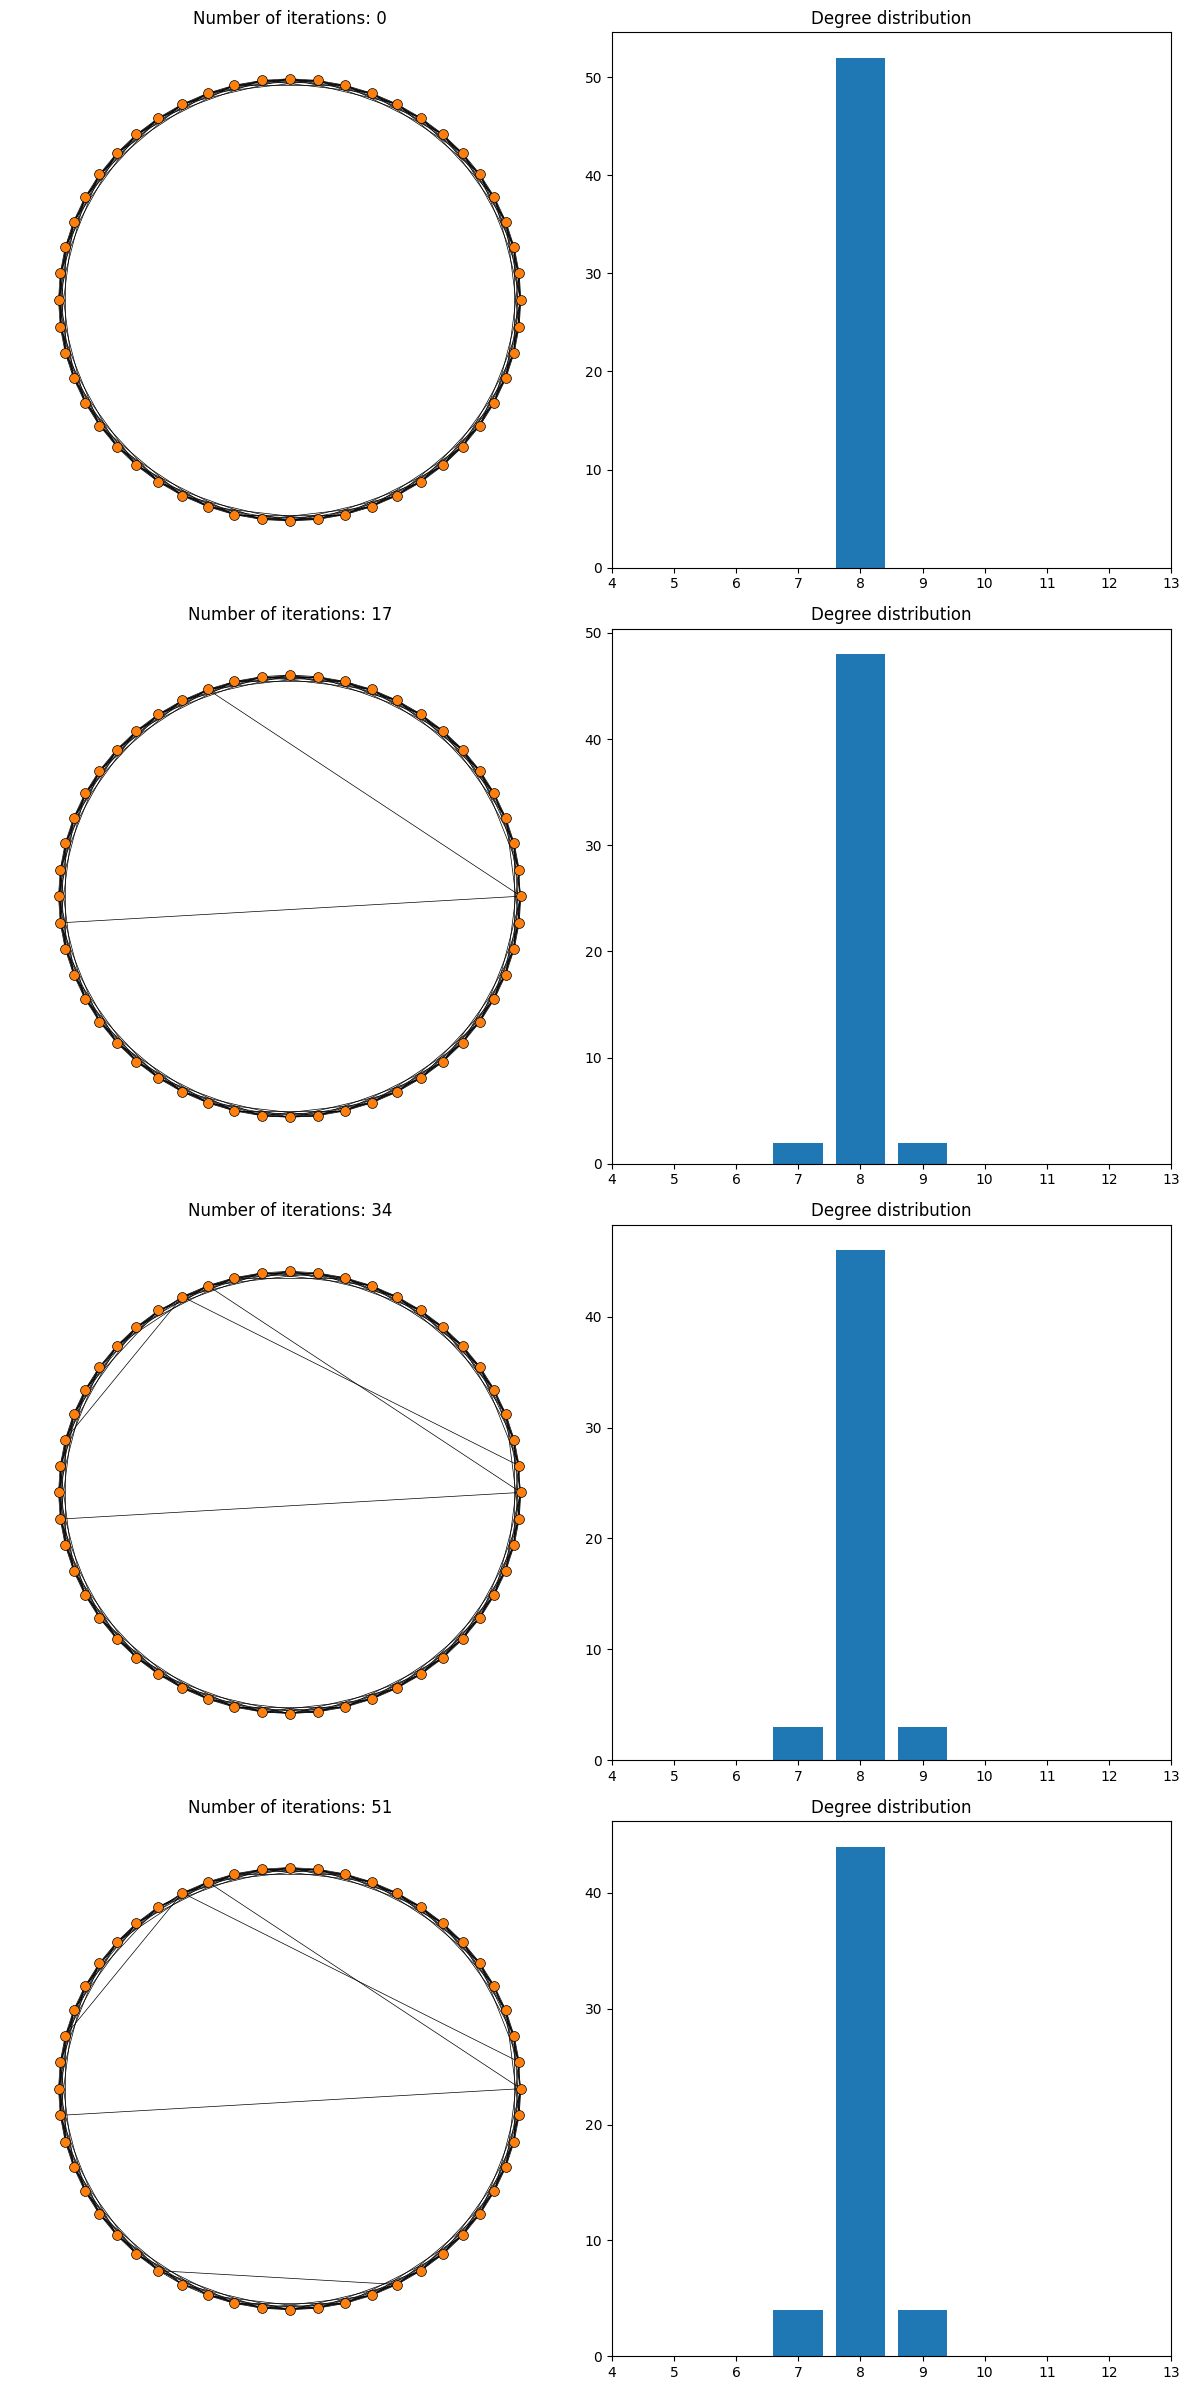

In [28]:
n, k, p = 52, 8, 0.2
G = ringLattice(n, k)
iterations = np.arange(0, n+1, int(n/3))

plt.figure(figsize=(12, 24))

for i, node in enumerate(iterations, 1):
    plt.subplot(4, 2, 2 * (i - 1) + 1)
    plt.title(f'Number of iterations: {node}')
    nx.draw_circular(G, node_size=50, width=0.5, linewidths=0.5, edgecolors='black', node_color='tab:orange')
    
    plt.subplot(4, 2, 2 * (i - 1) + 2)
    degree_seq = [degree for node, degree in G.degree]
    bins, freq = np.unique(degree_seq, return_counts=True)
    plt.bar(bins, freq)
    plt.xlim((4, 13))
    plt.title('Degree distribution')
    
    rewire(G, node, k, p)

plt.tight_layout()
plt.show()

### Task 4: Mô hình sinh Barabási–Albert

Trong phần này, chúng ta sử thử cài đặt mô hình sinh Barabási–Albert hay còn gọi là preferential attachment model. Mô hình này là quá trình quá triển mà trong đó mỗi đỉnh mới liên kết đến `m` đỉnh đang tồn tại. Bậc đỉnh càng cao, xác suất liên kết càng cao. Cuối cùng, số lượng đỉnh trong đồ thị là `n`.

Bạn sẽ bắt đầu từ một đồ thị hình sao với `m+1` đỉnh. Trong mỗi bước, bạn sẽ tạo ra `m` cạnh giữa một đỉnh mới và các đỉnh đang tồn tại. Xác suất liên kết đến một đỉnh $i$ nào đó là:
$$p(i) = \frac{k_i}{\sum k}$$

Bây giờ, bạn hoàn thành hàm `attach` mà đính một đỉnh `node` đến một đồ thị `G` thông qua `m` cạnh.

Bạn sẽ tạo danh sách có các đỉnh lặp lại từ danh sách các cạnh. Ví dụ: $[(1, 2), (2, 3), (2, 4)] \to [1, 2, 2, 3, 2, 4]$. Chọn ngẫu nhiên đồng nhất từng đỉnh một. Áp dụng `random.choice` thay vì `np.random.choice` để tăng tốc độ tạo.

In [29]:
def attach(node: int, G: nx.Graph, m: int) -> nx.Graph:
    """Hàm attach

    Parameters
    ----------
    node
        (int) đỉnh cho trước
    G
        (nx.Graph) đồ thị cho trước
    m
        (int) số lượng đỉnh đang tồn tại

    Returns
    -------
        (nx.Graph) đồ thị kết quả
    """
    # YOUR CODE HERE
    # barabási-albert model
    # Add a new node
    repeated_nodes = [node for edge in G.edges for node in edge]
    G.add_node(node)
    chosen_nodes = set()
    while len(chosen_nodes) < m:
        target = random.choice(repeated_nodes)
        chosen_nodes.add(target)
    G.add_edges_from([(node, target) for target in chosen_nodes])
    return G

In [30]:
def BAGraphGenerator(n: int, m: int, random_seed: int = 1) -> nx.Graph:
    """Hàm sinh đồ thị dựa trên mô hình Barabási–Albert

    Parameters
    ----------
    n
        (int) số lượng đỉnh của đồ thị sau cùng
    m
        (int) số lượng đỉnh đang tồn tại
    random_seed, optional
        (int) random seed cho phát sinh ngẫu nhiên, by default 1

    Returns
    -------
        (nx.Graph) đồ thị kết quả
    """
    G = nx.star_graph(m)
    for i in range(1, n - m):
        attach(m + i, G, m)
    return G

In [31]:
# Set up for test
G = nx.star_graph(3)
attach(4, G, 3)
assert nx.number_of_edges(G) == 6

In [32]:
# Test 1
n, m = 10, 3
G = BAGraphGenerator(n, m)
degree_seq = [degree for (node, degree) in G.degree]
nxG = nx.barabasi_albert_graph(n, m)
nxdegree_seq = [degree for (node, degree) in nxG.degree]
assert ks_2samp(degree_seq, nxdegree_seq).pvalue > 0.05

In [33]:
# Test 2
n, m = 1000, 3
G = BAGraphGenerator(n, m)
degree_seq = [degree for (node, degree) in G.degree]
nxG = nx.barabasi_albert_graph(n, m)
nxdegree_seq = [degree for (node, degree) in nxG.degree]
assert ks_2samp(degree_seq, nxdegree_seq).pvalue > 0.05

In [34]:
# Test 3
n, m = 1000, 20
G = BAGraphGenerator(n, m)
degree_seq = [degree for (node, degree) in G.degree]
nxG = nx.barabasi_albert_graph(n, m)
nxdegree_seq = [degree for (node, degree) in nxG.degree]
assert ks_2samp(degree_seq, nxdegree_seq).pvalue > 0.05

## Phần 3: Bạn biết gì thêm về hai mô hình tạo sinh vừa giới thiệu? Hoặc các mô hình khác mà bạn thích. (2 điểm)

Hai mô hình tạo sinh đã được giới thiệu ở trên:
- Mô hình Watts-Strogatz
- Mô hình Barabási–Albert



### Mô hình Watts-Strogatz
Mô hình Watts-Strogatz là một mô hình tạo sinh đồ thị ngẫu nhiên với các đặc điểm của mạng thế giới nhỏ (small-world network) bao gồm đường kính ngắn và độ cụm cao được giới thiệu bởi Duncan J. Watts và Steven Strogatz vào năm 1998. Mô hình này nhằm mục đích mô phỏng các đặc tính của các mạng nhỏ thế giới thực tế, như các mạng xã hội, mạng thông tin, và nhiều hệ thống tự nhiên khác.

#### Quy trình tạo mô hình Watts-Strogatz:
1. **Tạo một đồ thị vòng đều (ring lattice):** Với `n` đỉnh, mỗi đỉnh kết nối với `k` đỉnh lân cận gần nhất (k/2 đỉnh bên trái và k/2 đỉnh bên phải). Điều này đảm bảo rằng đồ thị ban đầu có cấu trúc tuần hoàn với các kết nối đều đặn.
2. **Nối lại các cạnh với xác suất `p`:** Với mỗi cạnh `(u, v)`, chúng ta sẽ nối lại đỉnh `v` thành một đỉnh ngẫu nhiên `w` với xác suất `p`. Việc này tạo ra các kết nối ngẫu nhiên trong đồ thị, làm giảm khoảng cách trung bình giữa các đỉnh mà vẫn giữ được độ cụm cao.

**Đặc điểm của mô hình:**
- Độ cụm cao: Các đỉnh có xu hướng kết nối với các đỉnh lân cận, tạo ra các cụm hoặc nhóm nhỏ mà trong đó các đỉnh kết nối chặt chẽ với nhau. 
- Đường kính ngắn: Đường đi ngắn nhất giữa hai đỉnh bất kỳ (khoảng cách trung bình giữa các cặp đỉnh) trong đồ thị thường nhỏ hơn so với số lượng đỉnh, làm cho thông tin có thể lan truyền nhanh chóng trong mạng.


#### Ứng dụng của mô hình:
- Mô hình Watts-Strogatz đã được sử dụng để mô phỏng các mạng xã hội, mạng thông tin, mạng giao thông, và nhiều hệ thống phức tạp khác.
- Mô hình này giúp giải thích các đặc tính của các mạng thế giới nhỏ thực tế, như mạng xã hội với độ cụm cao và đường kính ngắn.

### Mô hình Barabási–Albert
Mô hình Barabási–Albert là một mô hình tạo sinh mạng lưới scale-free dựa trên nguyên lý đính kèm ưu tiên (preferential attachment), được giới thiệu bởi Albert-László Barabási và Réka Albert vào năm 1999. Mô hình này mô phỏng các mạng thực tế có phân phối bậc đỉnh theo phân phối mũ, trong đó một số ít các đỉnh có độ kết nối rất cao (hub nodes) trong khi phần lớn các đỉnh có độ kết nối thấp. Một đỉnh mới được thêm vào mạng sẽ có xu hướng kết nối với các đỉnh có độ kết nối cao.

**Quy trình tạo mô hình Barabási–Albert:**
1. **Bắt đầu với một đồ thị nhỏ:** Ban đầu có một số lượng nhỏ các đỉnh được kết nối với nhau. Ví dụ, chúng ta có thể bắt đầu với một đồ thị hoàn chỉnh với `m0` đỉnh.
2. **Thêm các đỉnh mới với các cạnh mới:** Mỗi đỉnh mới sẽ được thêm vào đồ thị cùng với `m` cạnh cố định kết nối đến các đỉnh hiện có.
3. **Cạnh mới được nối theo nguyên lý đính kèm ưu tiên (preferential attachment):** Xác suất mà một đỉnh hiện có sẽ nhận thêm cạnh mới tỷ lệ thuận với số lượng cạnh hiện có của nó (độ kết nối của nó). Điều này có nghĩa là các đỉnh có nhiều kết nối sẽ có xác suất cao hơn để nhận thêm các kết nối mới.


**Đặc điểm của mô hình:**
- **Phân phối bậc đỉnh theo phân phối mũ:** Một số ít các đỉnh có độ kết nối rất cao (hub nodes), trong khi phần lớn các đỉnh có độ kết nối thấp. Điều này dẫn đến một mạng có cấu trúc phân cấp với một số ít các nút trung tâm có vai trò quan trọng.
- **Hiệu ứng người giàu càng giàu (rich-get-richer effect):** Các đỉnh càng có nhiều kết nối sẽ càng thu hút thêm nhiều kết nối mới, làm cho chúng trở nên càng ngày càng quan trọng hơn trong mạng.

#### Ứng dụng:
Mô hình Barabási–Albert được sử dụng để mô phỏng các mạng Internet, nơi mà một số ít các trang web có rất nhiều liên kết (như Google, Facebook) trong khi phần lớn các trang web khác có ít liên kết hơn. Nó cũng được dùng trong các mạng sinh học, nơi một số ít các protein có rất nhiều liên kết với các protein khác.

### Các mô hình khác

#### Mô hình Erdős–Rényi
Mô hình Erdős–Rényi là một trong những mô hình đồ thị ngẫu nhiên đơn giản và cổ điển nhất, được Paul Erdős và Alfréd Rényi giới thiệu. Mô hình này tạo ra các đồ thị ngẫu nhiên bằng cách thêm các cạnh vào đồ thị với xác suất cố định.

##### Quy trình tạo mô hình Erdős–Rényi:
1. **Khởi tạo đồ thị rỗng:** Bắt đầu với một tập hợp các đỉnh mà không có cạnh nào.
2. **Thêm các cạnh với xác suất `p`:** Mỗi cặp đỉnh (u, v) sẽ được kết nối với xác suất `p` độc lập. Điều này dẫn đến việc các cạnh được thêm vào đồ thị một cách ngẫu nhiên.

##### Đặc điểm của mô hình:
- **Phân phối bậc đỉnh theo Poisson:** Trong mạng lớn, phân phối bậc đỉnh sẽ xấp xỉ phân phối Poisson, với hầu hết các đỉnh có số lượng cạnh gần bằng giá trị trung bình.
- **Ngẫu nhiên hoàn toàn:** Mô hình này tạo ra các đồ thị hoàn toàn ngẫu nhiên, không có cấu trúc cụ thể.

##### Ứng dụng:
Mô hình Erdős–Rényi được sử dụng để mô phỏng và nghiên cứu các mạng ngẫu nhiên, nơi mà các cạnh giữa các đỉnh được thêm vào một cách ngẫu nhiên.

#### Mô hình Holme-Kim
Mô hình Holme-Kim là một sự mở rộng của mô hình Barabási–Albert, nhằm cải thiện độ cụm (clustering coefficient) của các đồ thị tạo sinh. Mô hình này được giới thiệu bởi Petter Holme và Beom Jun Kim vào năm 2002.

##### Quy trình tạo mô hình Holme-Kim:
1. **Khởi tạo như mô hình Barabási–Albert:** Bắt đầu với một đồ thị nhỏ và thêm các đỉnh mới theo nguyên lý ưu tiên.
2. **Tăng cường cụm:** Sau khi một đỉnh mới kết nối với một đỉnh hiện có, nó có thể tạo thêm một cạnh với một trong những đỉnh láng giềng của đỉnh hiện có với xác suất `p`. Điều này tăng cường khả năng tạo thành các tam giác, làm tăng độ cụm của đồ thị.

##### Đặc điểm của mô hình:
- **Độ cụm cao:** Đồ thị tạo ra có độ cụm cao hơn so với mô hình Barabási–Albert, phù hợp hơn với các mạng xã hội thực tế.
- **Phân phối bậc đỉnh theo hàm mũ:** Vẫn duy trì được phân phối bậc đỉnh theo hàm mũ giống như mô hình Barabási–Albert.

##### Ứng dụng:
Mô hình Holme-Kim được sử dụng để mô phỏng các mạng xã hội, nơi mà các nhóm bạn bè có xu hướng kết nối chặt chẽ với nhau, và để nghiên cứu các hệ thống mạng có độ cụm cao.


### Nguồn tham khảo:
- Watts, D. J., & Strogatz, S. H. (1998). Collective dynamics of ‘small-world’ networks. Nature, 393(6684), 440-442.
- [Watts-Strogatz model](https://en.wikipedia.org/wiki/Watts%E2%80%93Strogatz_model)
- Barabási, A. L., & Albert, R. (1999). Emergence of scaling in random networks. Science, 286(5439), 509-512.
- [Barabási–Albert model](https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model)
- Erdős, P., & Rényi, A. (1960). On the evolution of random graphs. Publications of the Mathematical Institute of the Hungarian Academy of Sciences, 5, 17-60.
- [Erdős–Rényi model](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model)
- Holme, P., & Kim, B. J. (2002). Growing scale-free networks with tunable clustering. Physical Review E, 65(2), 026107.
